# Library Imports and Style Configuration

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import catppuccin
plt.style.use(catppuccin .PALETTE.latte.identifier)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading

In [2]:
df = pd.read_csv("Iris.csv")

# Data Exploration

In [3]:
print("="*16, "First View of Dataset", "="*16)
df.head()

================ First View of Dataset ================


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


## Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Missing Values

In [6]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Species of Iris

In [7]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Create dependent or target variable (y)

In [8]:
df["Target"] = df["Species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

In [9]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0


# Pairwise Feature Relationships by Species

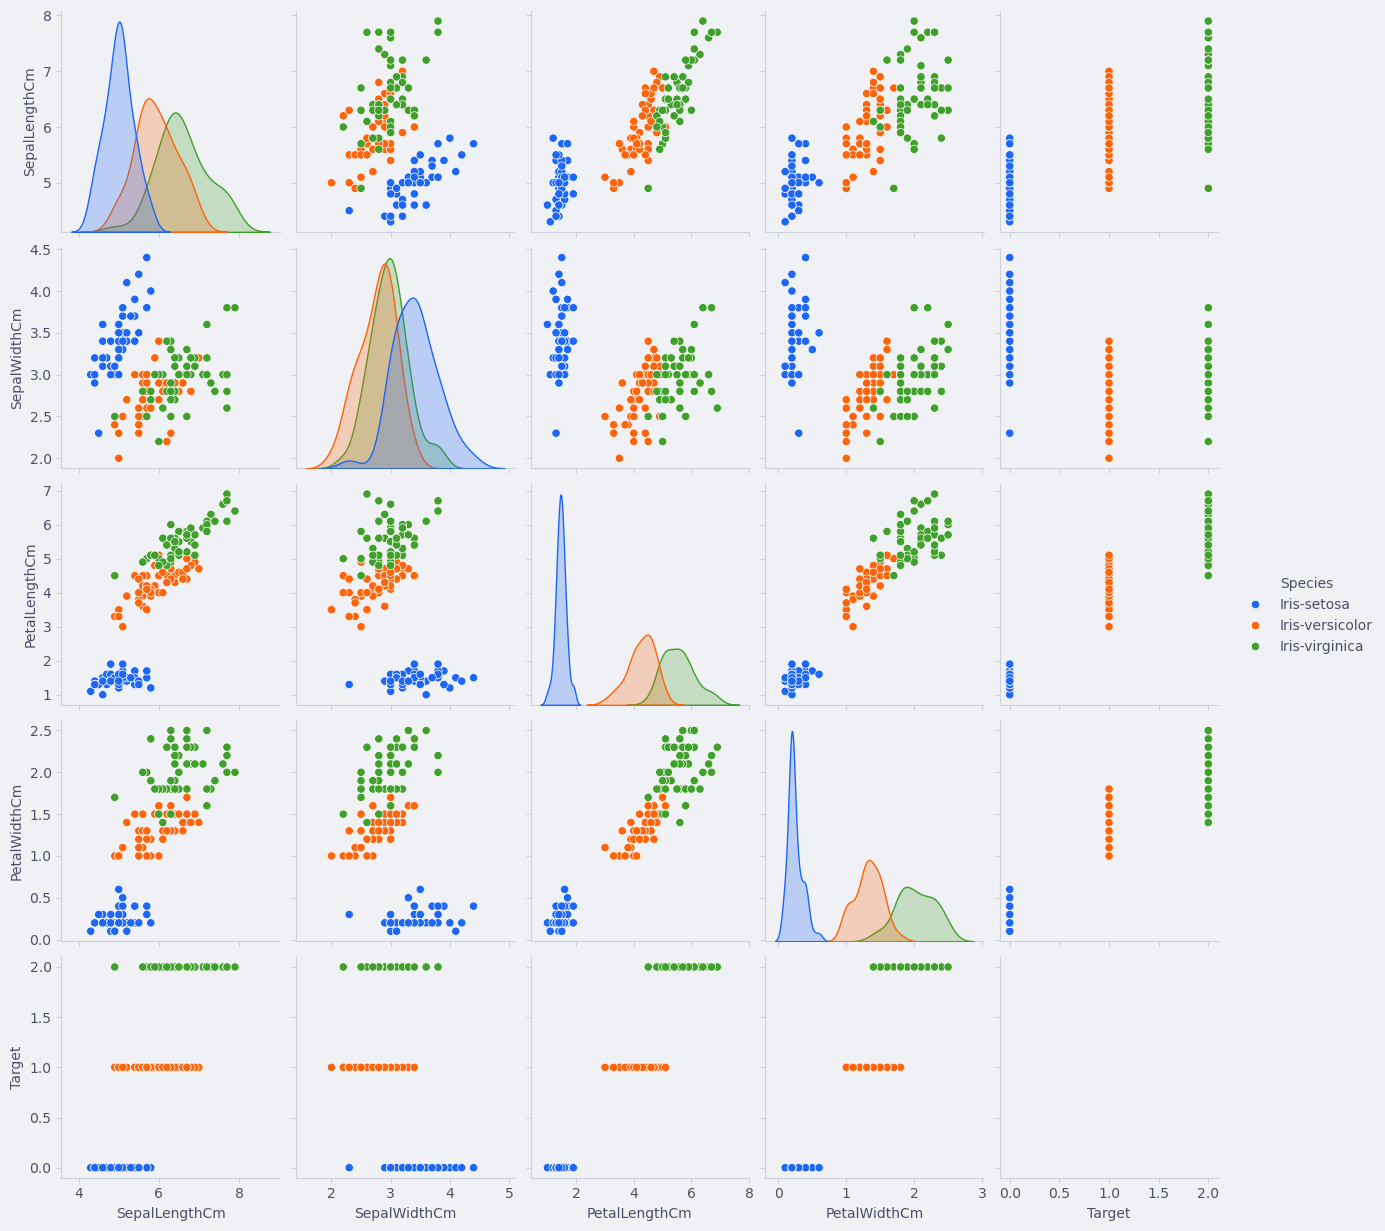

In [10]:
sns.pairplot(df, hue="Species")
plt.show()

# Data Preparation for Machine Learning Models

## Train Test Split

In [11]:
X = df.drop(['Species', 'Target'], axis='columns')
y = df['Target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Model development and prediction

## Standardization

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ML Models

In [14]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0


In [15]:
# SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)
y_pred_svc = svc_model.predict(X_test_scaled)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

SVC Accuracy: 0.9736842105263158


In [16]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9736842105263158


In [17]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9736842105263158


# Comparing performances

In [18]:
models = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svc),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]
accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)
accuracy_df

,Model,Accuracy
0,Logistic Regression,1.000000
1,SVC,0.973684
2,Decision Tree,0.973684
3,Random Forest,0.973684


# Comparing performances in Bar Graph

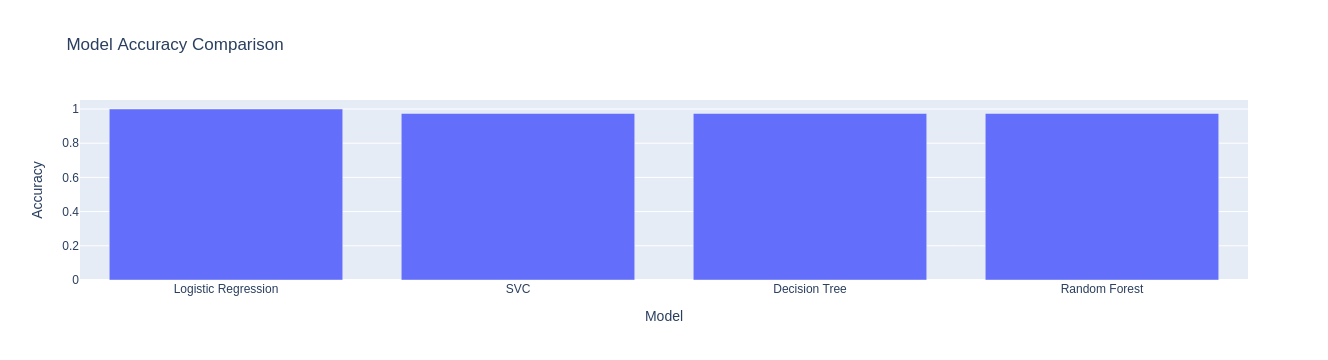

In [19]:
import plotly.express as px
fig = px.bar(accuracy_df, x='Model', y='Accuracy', title='Model Accuracy Comparison')
fig.update_layout(xaxis_title='Model', yaxis_title='Accuracy')
fig.show()